# Lesson 4: Birvariate Exploration of Data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Introduction

## Scatterplots and Correlation
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

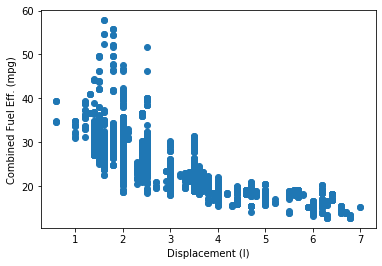

In [128]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

Seaborn's `regplot` function combines scatterplot creation with regression function fitting:

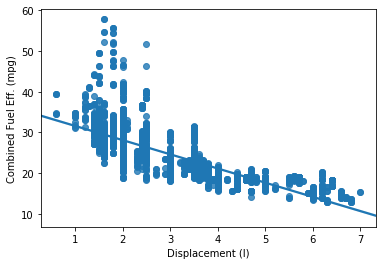

In [129]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency and Jitter

## Heatmaps



## Scatterplot Practice

## Violin Plots

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

In [134]:
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

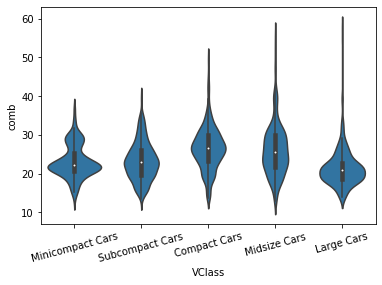

In [139]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb',color=base_color);
plt.xticks(rotation=15);

## Box Plots

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot function.

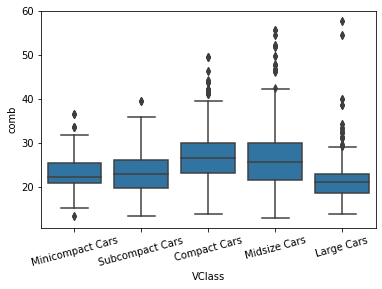

In [132]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color);
plt.xticks(rotation = 15);

## Violin and Box Plot Practice
## Clustered Bar Charts
## Categorical Plot Practice
## Faceting
## Adaptation of Univariate Plots

## Line plots

* Line emphasizes relative change (rather than bars). Zero on the y-axis is not necessary;
* Line emphasizes connections on the x-axis. Inappropriate to use line if we have a nominal variable on the x-axis;
* Line plot showing changes over time is called **Time Series Plot**

``sb.pointplot``
``sb.errorbar``

Lesson summary:
* scatterplots show relationship between two **quanti**tative variables
* clustered bar charts show relationship between two **quali**tative variables
* heat maps can be used as 2D histogram and bar charts
* violin and box plots are used to show the relationship between one quantitative and one qualitative variable
* line plots

Additional techniques to adapt univariate plots to bivariate data:
* faceting multiple univariate plots across subsets of a second variable
* using second variables **mean** instead of count

Text(0, 0.5, 'Avg. Combined fuel Eff.(mpg)')

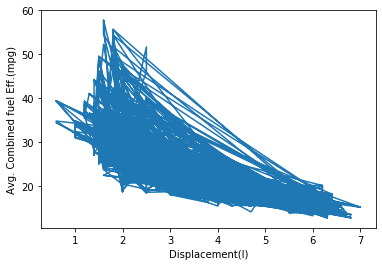

In [3]:
plt.errorbar(data=fuel_econ, x='displ',y='comb');
plt.xlabel('Displacement(l)')
plt.ylabel('Avg. Combined fuel Eff.(mpg)')

In [17]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1]+0.1

# chop the dataset into bins
displ_binned = pd.cut(fuel_econ['displ'],bins_e, include_lowest = True)
# calculate mean values of each bin
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
# calculate standard error of mean
comb_sem = fuel_econ['comb'].groupby(displ_binned).sem()

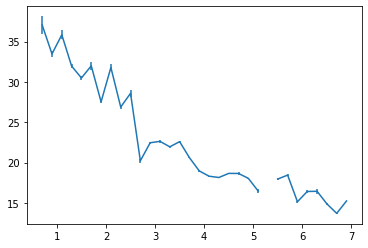

In [24]:
# plot the mean together with the standard error of mean
plt.errorbar(x=bins_c,y=comb_mean,yerr=comb_sem);
# plt.xlabel('Displacement(l)')
# plt.ylabel('Avg. Combined fuel Eff.(mpg)')


Text(0, 0.5, 'num_var2')

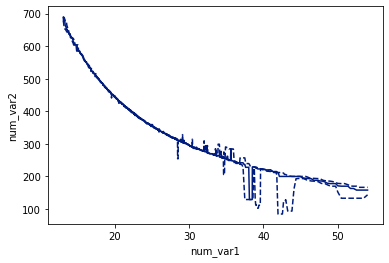

In [28]:
# compute statistics in a rolling window
df_window = fuel_econ.sort_values('comb').rolling(15)
x_winmean = df_window.mean()['comb']
y_median = df_window.median()['co2']
y_q1 = df_window.quantile(.25)['co2']
y_q3 = df_window.quantile(.75)['co2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
# plt.scatter(data = fuel_econ, x = 'combined fuel consumption', y = 'CO2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

## Additional Plot Practice

## Lesson Summary

## Q-Q Plots

There might be cases where you are interested to see how closely your numeric data follows some hypothetical distribution. This might be important for certain parametric statistical tests, like checking for assumptions of normality. In cases like this, you can use a quantile-quantile plot, or Q-Q plot, to make a visual comparison between your data and your reference distribution. 

## Swarm Plots

In this lesson, you saw many ways of depicting the relationship between a numeric variable and a categorical variable. Violin plots depicted distributions as density curves, while box plots took a more summary approach, plotting the quantiles as boxes with whiskers. Another alternative to these plots is the swarm plot. Similar to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap. A swarm plot can be created in seaborn using the swarmplot function, similar to how you would a call violinplot or boxplot.

## Rug and Strip Plots

You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the rug plot employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

Seaborn's JointGrid class enables this plotting of bivariate relationship with marginal univariate plots for numeric data. The `plot_joint` method specifies a plotting function for the main, joint plot for the two variables, while the `plot_marginals` method specifies the plotting function for the two marginal plots. Here, we make use of seaborn's rugplot function.

In [ ]:
g = sb.JointGrid(data = df, x = 'num_var1', y = 'num_var2')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

## Stacked Plots

## Ridgeline Plots

One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" part of the lesson, where multiple lines were plotted on the same axes, with different hues. 

# Lesson 5: Multivariate Exploration of Data

## Introduction

* Shape is good encoding for categorical data

## Non-Positional Encodings for Third Variables

In [29]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars','Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [42]:
np.random.seed(2018)
# take a random sample of 200 cars to reduce over-plotting
sample = np.random.choice(fuel_econ.shape[0],200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

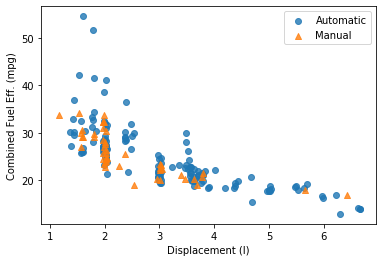

In [45]:
ttype_markers = [['Automatic','o'],
                ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==ttype]
    sb.regplot(data = plot_data, x='displ', y='comb',
          x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

plt.legend(['Automatic','Manual']);

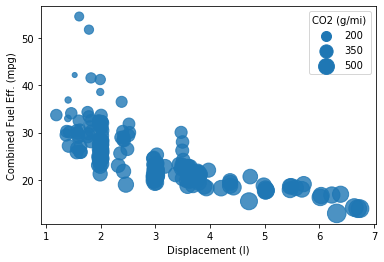

In [51]:
sb.regplot(data = fuel_econ_subset, x='displ', y='comb',
          x_jitter = 0.04, fit_reg = False,
          scatter_kws = {'s':fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');


# workaround to create legend
# creating dummy scatter plots 
legend_obj = []
sizes = [200,350,500]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2,color=base_color))
    
plt.legend(legend_obj, sizes, title='CO2 (g/mi)')

## Color Palettes

* Qualitative: geared towards **nominal data**. Distinct hues with similar brightness and saturation. No ordering is implied. 
* Sequential: **ordinal** and **numeric** data.
* Divergent: for certain ordinal or numeric data that have a **meaningful center point**.

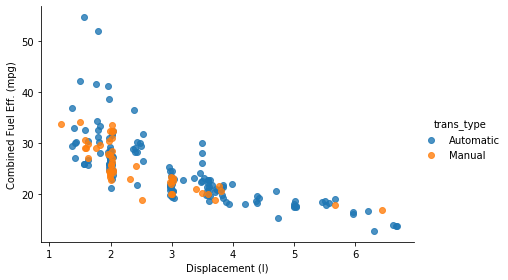

In [59]:
g = sb.FacetGrid(data=fuel_econ_subset, hue='trans_type',
                hue_order=['Automatic','Manual'],size=4, aspect=1.5);
g.map(sb.regplot,'displ', 'comb'
          x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

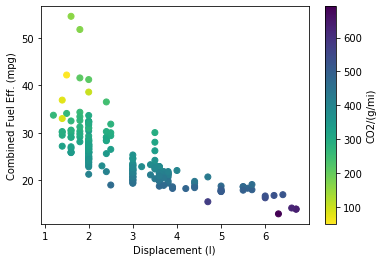

In [67]:
plt.scatter(data=fuel_econ_subset,x='displ',y='comb', c='co2',
                 cmap='viridis_r');
plt.colorbar(label='CO2/(g/mi)')
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

## Encoding Practice

## Faceting in Two Directions

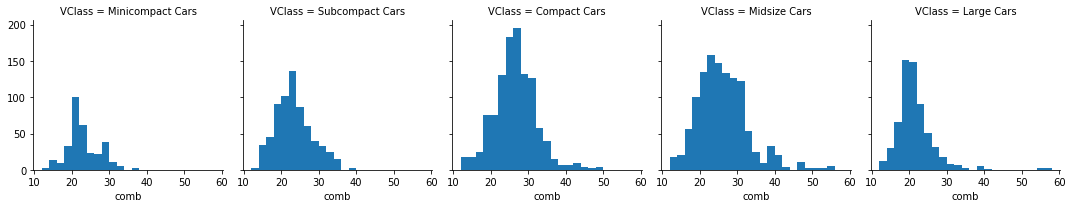

In [69]:
bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data=fuel_econ,col='VClass');
g.map(plt.hist,'comb',bins=bins);

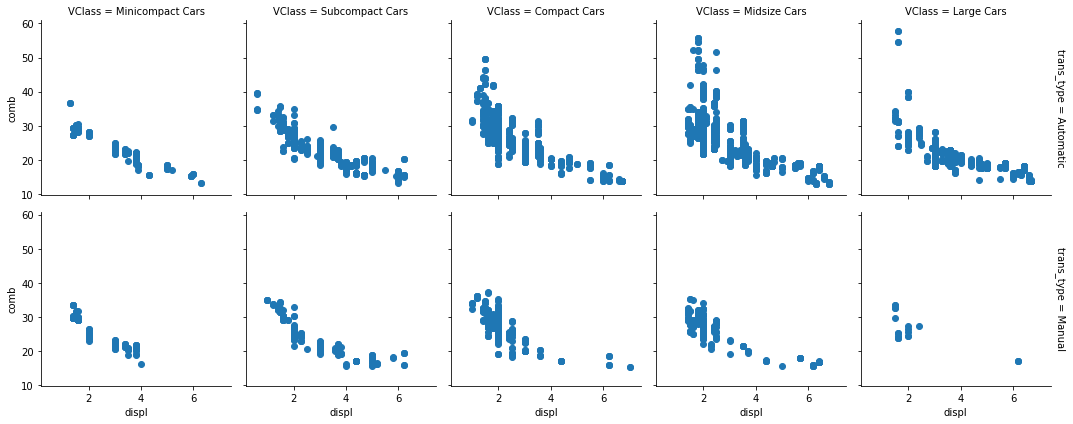

In [72]:
g = sb.FacetGrid(data=fuel_econ,col='VClass',row='trans_type',
                margin_titles=True);
g.map(plt.scatter,'displ','comb');

## Other Adaptations of Bivariate Plots

Text(0, 0.5, 'Avg. combined efficiency (mpg)')

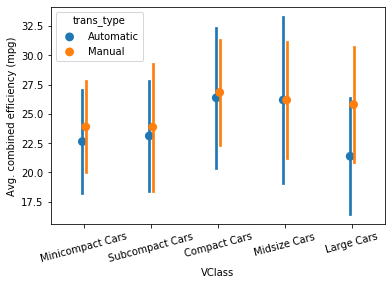

In [77]:
sb.pointplot(data=fuel_econ, x='VClass',y='comb',hue='trans_type',
             ci='sd',linestyles=" ", dodge=True);
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0, 0.5, 'Avg. combined efficiency (mpg)')

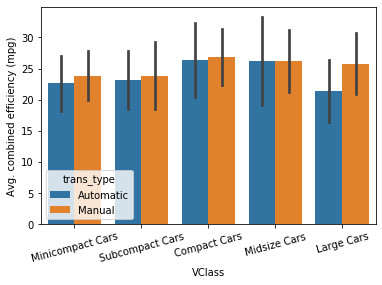

In [78]:
sb.barplot(data=fuel_econ, x='VClass',y='comb',hue='trans_type',
             ci='sd');
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)')

Text(0, 0.5, 'Avg. combined efficiency (mpg)')

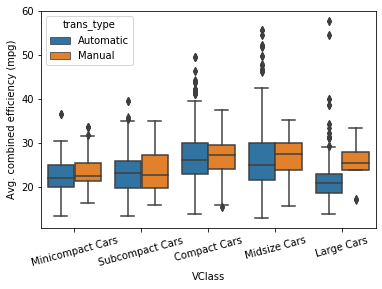

In [80]:
sb.boxplot(data=fuel_econ, x='VClass',y='comb',hue='trans_type');
plt.xticks(rotation=15)
plt.ylabel('Avg. combined efficiency (mpg)')

Adapt heat map so that instead of colour being based on count - we get colour based on the mean of the third variable.

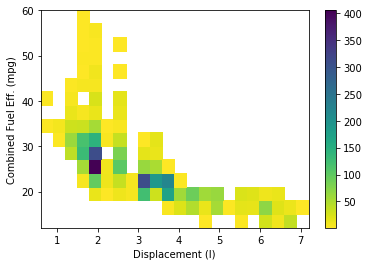

In [83]:
# Let's change this heat map of fuel efficiency against engine size, 
# so that average CO2 output is plotted instead

bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ',y='comb',cmin=0.5,
           cmap='viridis_r',bins=[bins_x,bins_y]);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

There is a weights parameter hist2d that sets how much each data point is worth in the aggregation. By default each point's weight is counted as 1 so that the colors reflect the total counts. If we change it so that each point's weight is equal to its CO2 emissions divided by the number of cars in its bin then the total within each bin will be the average CO2 emissions

In [141]:
# First step is to figure out in which bin every point falls
# labels=False is set so that the bins are identified numerically
# apply 'astype' to make indexing later easier
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False,
                  labels = False).astype(int)

# calculate number of points that fall in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()
# reset index and pivot to put the counts in array form to make multiindex
# series easier to work with
# use the values attribute to get the number of points as an array
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

# take CO2 series and divide each element by the number of points in each bin
# using the cut bins vectors for indexing into the right places
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

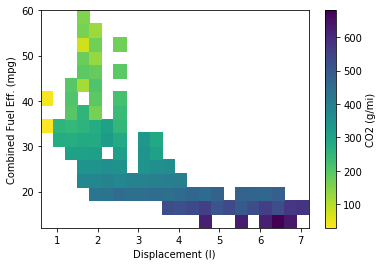

In [99]:
plt.hist2d(data=fuel_econ, x='displ',y='comb',cmin=0.5,
           cmap='viridis_r',bins=[bins_x,bins_y], weights = co2_weights);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label='CO2 (g/mi)');

This looks in line with the scatter plot that was made at section 2.2

## Adapted Plot Practice

## Plot Matrices

* explore multiple pairwise relationships at the same time
* unlike a faceted plot where each subplot is based on one subset of the data, each subplot in a plot matrix is based on the **whole data** but with two different variables on the axes.
* a univariate plot of each variable is usually placed along the diagonal line
* plot matrix is good for getting a broad overview of pairwise relationships between variables
* best as an **initial exploratory tool**

* heatmaps can also be adapted to depict pairwise correlations between variables in data

In [102]:
pokemon = pd.read_csv('./data/pokemon.csv')

In [103]:
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


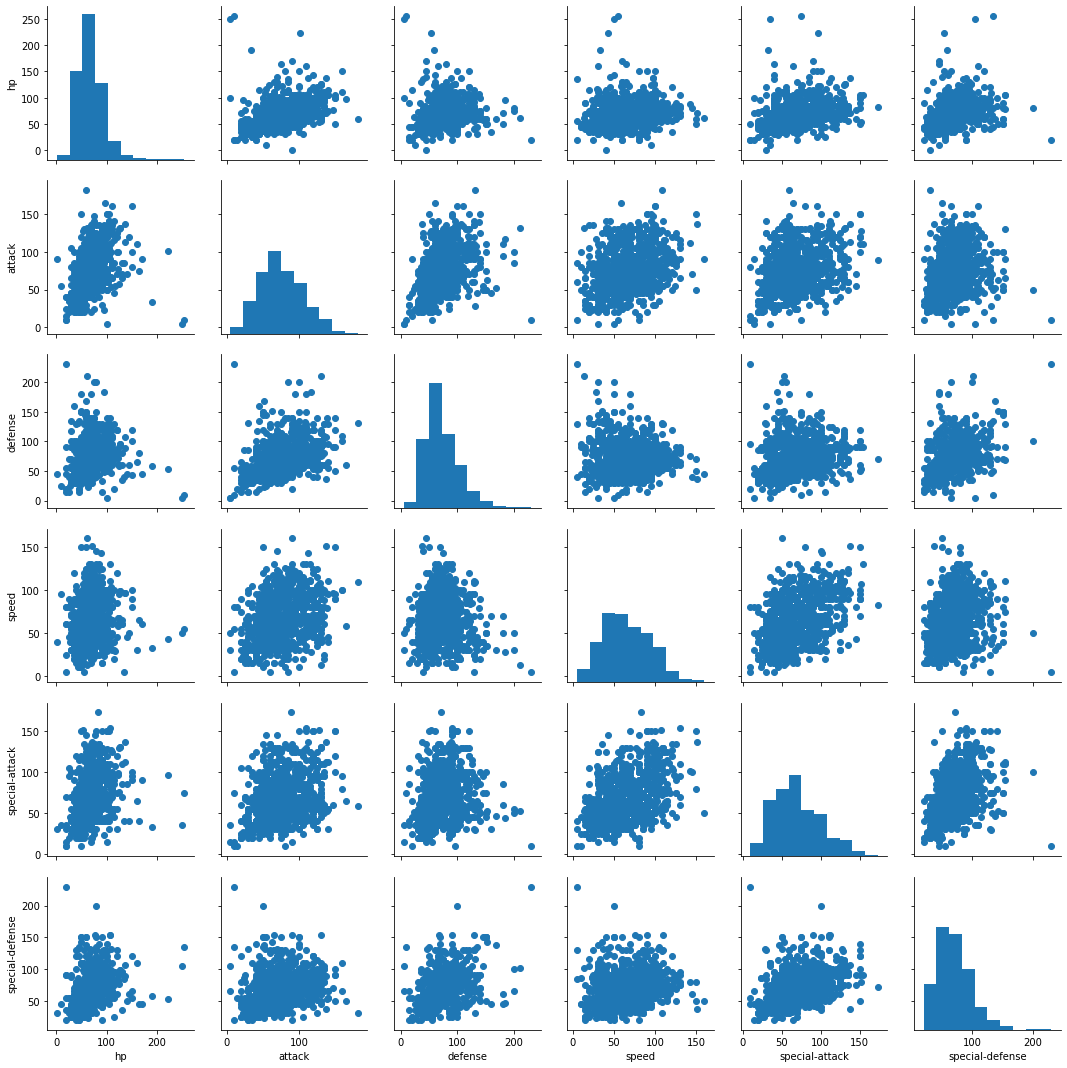

In [107]:
pkmn_stats = ['hp','attack','defense','speed','special-attack','special-defense']
g = sb.PairGrid(data=pokemon, vars = pkmn_stats);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

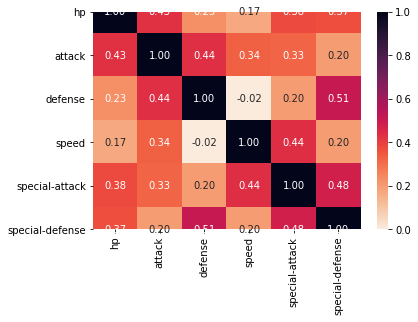

In [114]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, 
           fmt='.2f', vmin=0);

## Feature Engineering
* create new variables as functions of existing variables in data

In [116]:
pokemon['atk_ratio'] = pokemon['attack']/pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense']/pokemon['special-defense']

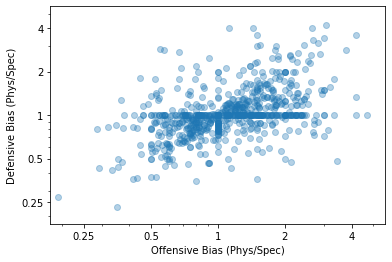

In [123]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3);
plt.xlabel('Offensive Bias (Phys/Spec)');
plt.ylabel('Defensive Bias (Phys/Spec)');
plt.xscale('log');
plt.yscale('log');
tick_loc = [0.25,0.5,1,2,4]
plt.xticks(tick_loc, tick_loc);
plt.yticks(tick_loc, tick_loc);
# set axis limits to remove exrteme outliers
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);

Most points seem to fall along a diagonal line. In the upper right quadrant we have Pokemon species that are physical biased in both offense and defense, while in the lower left-hand quadrant they are special biased in both offense and defense. Interestingly there appears to be a large number of pokemons on the Y=1 line showing no defensive bias. These pokemons have a wide range of offensive biases. There appears to be much less pokemons on the X=1 axis showing no offensive biases.

## Additional plot practice

## Lesson Summary

* Encodings: Shape, size, colour
* Faceting
* Additional adaptations of bivariate plots
* Plot and correlation matrices
* Feature engineering

# Lesson 6: Explanatory Visualizations